In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EX model validation
---

In [13]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import drive.MyDrive.scripts.utils as util

from keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

warnings.filterwarnings('ignore')

## Importing dataset

__File with anomalies for 04EX__:

Can be used for testing the LSTM model

```python
# Anomaly
FILE = {
    'ship': '13218',
    'year': '2023',
    'month': '3',
    'day': '9'
}
```

```python
# Other ship
FILE = {
    'ship': '13219',
    'year': '2023',
    'month': '9',
    'day': '4'
}
```

In [43]:
# Insert preferred ship and date here
FILE = {
    'ship': '13218',
    'year': '2023',
    'month': '3',
    'day': '9'
}

# NB: These arrays must be identical to the corresponding arrays in the model training script
cylinders = ['01EX', '02EX', '03EX', '04EX', '05EX', '06EX', '07EX', '08EX']
engine = ['21EL', '20EL', '25EL', '87XS', '96FG', '31EL', '31EL_LIM', '78XS', '82XS']

# Dataset size
SIZE = 'day' # Alternative: 'day'

In [44]:
if SIZE == 'month':
  try:
    df = util.open_dataset_at_month(FILE)
  except:
    !pip install fastparquet
    df = util.open_dataset_at_month(FILE)
else:
  try:
    df = util.open_dataset_at_date(FILE)
  except:
    !pip install fastparquet
    df = util.open_dataset_at_date(FILE)
df

,B21CA,14LO,24EL,07HT,54XA,55XA,57XA,16DO,15LO,05XS,...,05EX,01EX,06LO,06EX,07EX,08EX,05HT,87XS,missingMsgCount,frequencyMsgCount
time,,,,,,,,,,,,,,,,,,,,,
2023-03-09 00:00:00,0.580,4.604,11.272,80.4,5.0,5.0,5.0,6.898,4.625,0.0,...,343.0,336.0,68.7,349.0,331.0,326.0,77.8,39.442566,NaN,NaN
2023-03-09 00:00:01,0.580,4.621,11.552,80.4,NaN,NaN,NaN,6.829,4.705,0.0,...,342.0,336.0,68.7,349.0,331.0,326.0,77.8,38.597973,NaN,NaN
2023-03-09 00:00:02,0.580,4.621,11.920,80.4,5.0,5.0,5.0,6.730,4.661,0.0,...,342.0,336.0,68.7,349.0,331.0,326.0,77.8,40.709457,NaN,NaN
2023-03-09 00:00:03,0.582,4.601,11.768,80.4,5.0,5.0,5.0,7.023,4.618,0.0,...,342.0,336.0,68.7,349.0,331.0,326.0,77.8,40.287163,NaN,NaN
2023-03-09 00:00:04,0.580,4.647,12.048,80.4,5.0,5.0,5.0,7.086,4.640,0.0,...,342.0,335.0,68.7,349.0,331.0,326.0,77.8,40.709457,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09 23:59:55,0.745,4.659,12.872,79.2,5.0,5.0,5.0,6.892,4.741,0.0,...,344.0,350.0,69.1,363.0,341.0,341.0,76.1,44.932430,NaN,NaN
2023-03-09 23:59:56,0.747,4.627,12.680,79.1,5.0,5.0,5.0,6.753,4.719,0.0,...,344.0,350.0,69.1,363.0,341.0,341.0,76.1,45.777027,NaN,NaN
2023-03-09 23:59:57,0.738,4.633,12.936,79.2,5.0,5.0,5.0,6.727,4.589,0.0,...,344.0,350.0,69.1,363.0,341.0,341.0,76.1,44.932430,NaN,NaN


## Data cleanup and processing

### Fill cells containing <code>NaN</code> with attribute mean

In [45]:
df.fillna(df.mean(), inplace=True)

In [46]:
# Check to make sure there are not more ant nan values

df.isnull().sum()

B21CA                    0
14LO                     0
24EL                     0
07HT                     0
54XA                     0
                     ...  
08EX                     0
05HT                     0
87XS                     0
missingMsgCount      86325
frequencyMsgCount    86325
Length: 99, dtype: int64

### Removing attributes with constant values and producing modified dataset

---



In [47]:
df, engine, cylinders, controlled_parameters = util.produce_modified_dataset(df, engine, cylinders)
df

,21EL,25EL,87XS,01EX,02EX,03EX,04EX,05EX,06EX,07EX,08EX
time,,,,,,,,,,,
2023-03-09 00:00:00,904.0,21870.0,39.442566,336.0,351.0,334.0,352.0,343.0,349.0,331.0,326.0
2023-03-09 00:00:01,900.0,21740.0,38.597973,336.0,351.0,333.0,352.0,342.0,349.0,331.0,326.0
2023-03-09 00:00:02,900.0,21720.0,40.709457,336.0,351.0,333.0,352.0,342.0,349.0,331.0,326.0
2023-03-09 00:00:03,901.0,21720.0,40.287163,336.0,351.0,333.0,352.0,342.0,349.0,331.0,326.0
2023-03-09 00:00:04,901.0,21800.0,40.709457,335.0,351.0,333.0,352.0,342.0,349.0,331.0,326.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09 23:59:55,901.0,23860.0,44.932430,350.0,361.0,344.0,357.0,344.0,363.0,341.0,341.0
2023-03-09 23:59:56,902.0,23860.0,45.777027,350.0,361.0,344.0,357.0,344.0,363.0,341.0,341.0
2023-03-09 23:59:57,903.0,23860.0,44.932430,350.0,361.0,344.0,357.0,344.0,363.0,341.0,341.0


In [48]:
df = util.remove_rows_at(df, 'df["21EL"] >= 885')
df = util.remove_rows_at(df, 'df["25EL"] >= 14000')

## Qualitative dataset exploration

### Exploring correlating relationships

__For larger heatmaps__:

```python
correlation_matrix = df.corr()

title = 'Correlation Heatmap'
ship = f'\nShip: {FILE["ship"]}'
date = f'\nDate: {FILE["year"]}-{FILE["month"]}-{FILE["day"]}'

plt.figure(figsize=(50, 40))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"fontsize": 22})
plt.title(title + ship + date)
plt.xticks(rotation=45, fontsize=20)  
plt.yticks(rotation=45, fontsize=18)
plt.show()
```

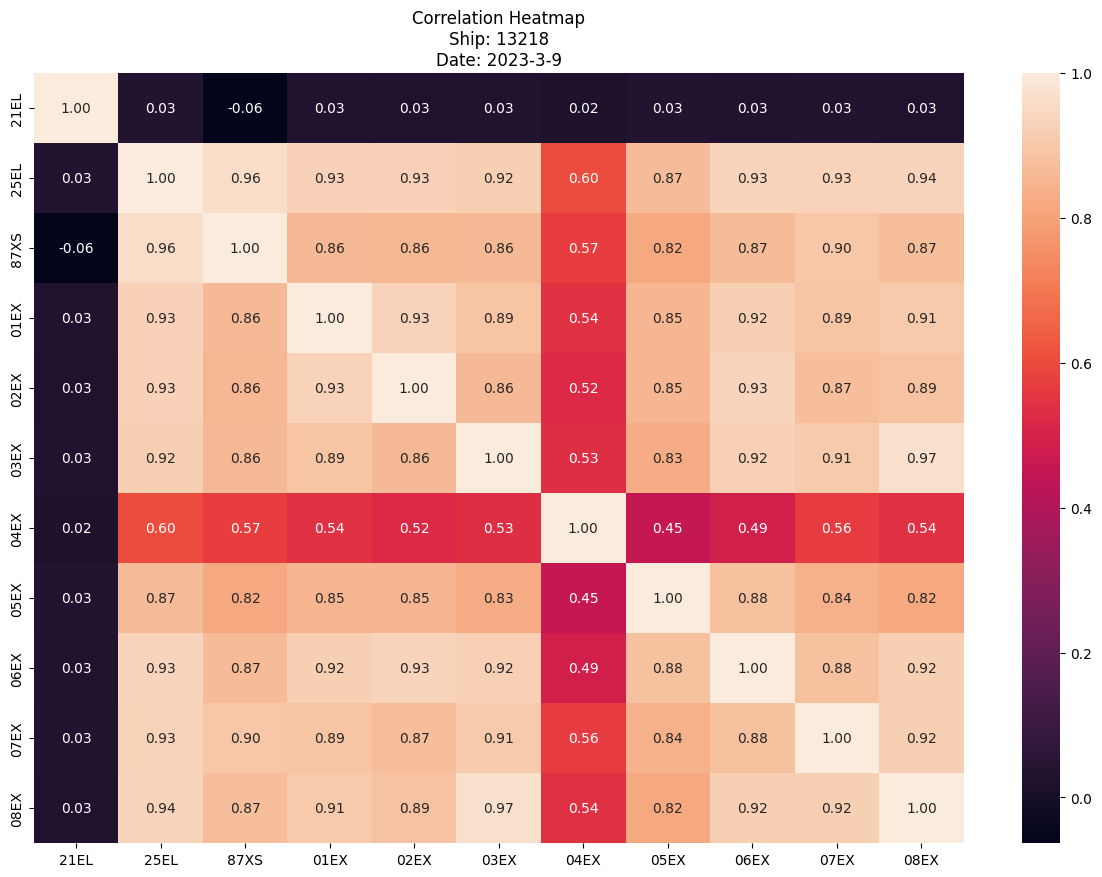

In [49]:
correlation_matrix = df.corr()

title = 'Correlation Heatmap'
ship = f'\nShip: {FILE["ship"]}'
date = f'\nDate: {FILE["year"]}-{FILE["month"]}-{FILE["day"]}'

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title(title + ship + date)
plt.show()

## Model validation

### Loading model

In [50]:
# Path to models
DIR = '/content/drive/MyDrive/models/'

# Insert model date here
m_year = '2024'
m_month = '04'
m_day = '08'

model = load_model(f'{DIR}{m_year}-{m_month}-{m_day}-v1-LSTM-EX.h5')

In [51]:
S_DIR = '/content/drive/MyDrive/scalers/'
S_TAG_NAME = 'EX'
S_ALGORITHM = 'minmax'
S_SHIP = '13218'
S_YEAR = '2023'
S_MONTH = '9'
S_DAY = '2'

S_PATH = f'{S_DIR}{S_TAG_NAME}-{S_ALGORITHM}-Dataset[{S_SHIP}-{S_YEAR}-{S_MONTH}]'

### Preparing testing data

In [52]:
# Setting desired input and output attributes
x_attributes = ['87XS'] # ['21EL', '25EL', '87XS']
y_attributes = cylinders

num_attributes_x = len(x_attributes)
num_attributes_y = len(y_attributes)
timesteps = 1

dfx = df[x_attributes]
dfy = df[y_attributes]

# Number of observations to predict
num_observations = df.shape[0]

# Retrieving the scaler used for training the data
scaler = joblib.load(f'{S_PATH}.joblib')
dfx = pd.DataFrame(scaler.transform(dfx))

# Extracting test data
X_test = dfx.iloc[:num_observations,:].values
X_test = X_test.reshape(num_observations, timesteps, num_attributes_x)

### Predicting 01EX, 02EX, ..., 08EX

In [53]:
# Perform predictions
predictions = model.predict(X_test)

# Split the transposed array into 8 separate arrays
print(f'\nDimensions of the array before:\t {predictions.shape}')

# Predictions are on the format (num_observations x timesteps x num_attributes_y)
# We need to convert it to the format (num_attributes_y x num_observations)
predictions = np.transpose(predictions, (2, 1, 0))
predictions = np.array([predictions[i].flatten() for i in range(predictions.shape[0])])

print(f'Dimensions of the array after:\t {predictions.shape}')
print(f'\nPredictions:\n{predictions}')

2698/2698 [==============================] - 8s 2ms/step

Dimensions of the array before:	 (86322, 1, 8)
Dimensions of the array after:	 (8, 86322)

Predictions:
[[338.6858  336.85034 341.1872  ... 348.90466 348.15796 348.90466]
 [349.2481  347.43628 351.6477  ... 358.7937  358.0993  358.7937 ]
 [335.61176 334.52563 337.51718 ... 344.38    343.72852 344.38   ]
 ...
 [343.18637 341.56656 345.31992 ... 351.60248 350.9972  351.60248]
 [332.5765  331.2329  334.55908 ... 340.93542 340.31735 340.93542]
 [324.4772  322.9569  327.10013 ... 336.7542  335.83658 336.7542 ]]


### Comparison of mean value of predictions and actual values

In [54]:
# Extracting actual values of 01EX, 02EX, ..., 08EX
selected_data = dfy.iloc[:num_observations,:]

print('\n\tActual\t\tPrediction\tDifference')
print('\t' + 42 * '-')

# Printing mean of actual, prediction, and the difference between them
for i in range(num_attributes_y):
  a = float(selected_data[cylinders[i]].mean())
  p = float(predictions[i].mean())
  print(f'{cylinders[i]}:\t{round(a, 3)}\t\t{round(p, 3)}\t\t{round(abs(a - p), 3)}')


	Actual		Prediction	Difference
	------------------------------------------
01EX:	339.829		342.586		2.757
02EX:	352.019		352.914		0.895
03EX:	336.032		339.058		3.026
04EX:	359.356		329.141		30.215
05EX:	339.532		336.652		2.88
06EX:	349.657		346.392		3.265
07EX:	334.797		335.876		1.079
08EX:	325.783		329.186		3.403


### Producing qualitative and quantitative accuracy

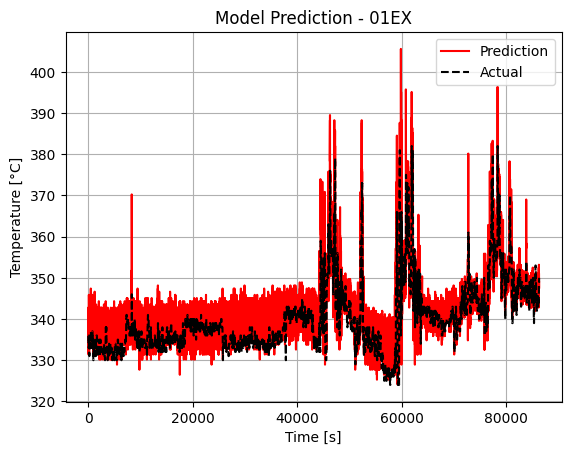


Mean Squared Error: 24.432015961643728
Root Mean Squared Error: 4.942875272717664
Mean Absolute Error: 3.8375708706250062
R-squared: 0.6414952292819802 



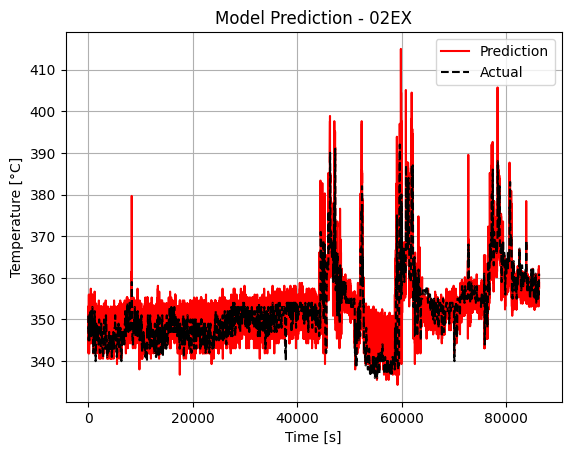


Mean Squared Error: 17.47006244910187
Root Mean Squared Error: 4.179720379295949
Mean Absolute Error: 3.0924807025052727
R-squared: 0.7431251966763809 



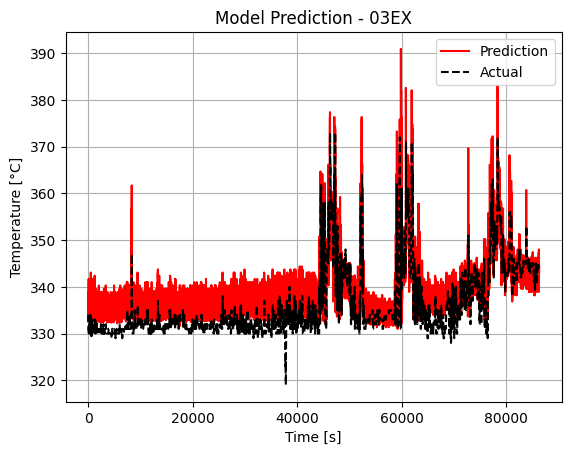


Mean Squared Error: 21.97079311992556
Root Mean Squared Error: 4.687301261912398
Mean Absolute Error: 3.9119683596546655
R-squared: 0.6031473709244382 



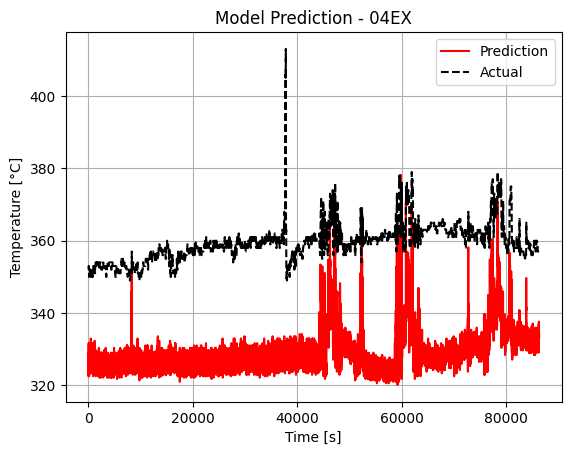


Mean Squared Error: 939.2813093752898
Root Mean Squared Error: 30.647696640617053
Mean Absolute Error: 30.216353168929857
R-squared: -34.212227907307806 



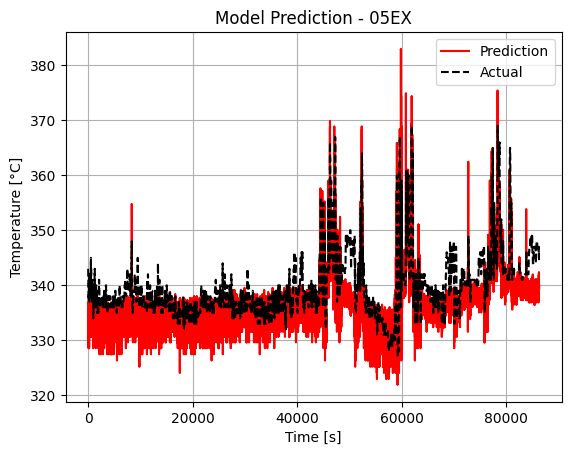


Mean Squared Error: 18.513761695987302
Root Mean Squared Error: 4.302762100789132
Mean Absolute Error: 3.3582775003782217
R-squared: 0.39645141189839805 



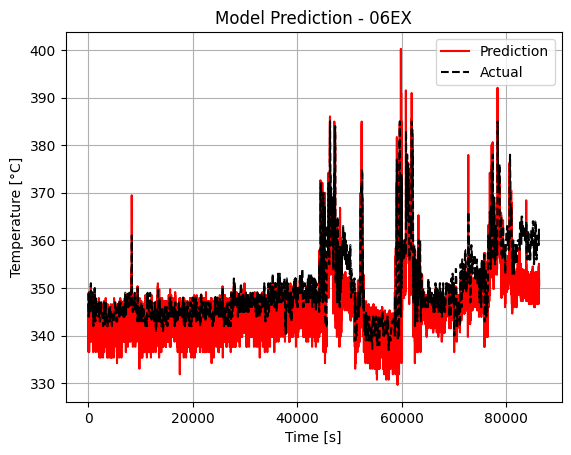


Mean Squared Error: 23.57326660422708
Root Mean Squared Error: 4.8552308497358885
Mean Absolute Error: 3.7591766318149644
R-squared: 0.5697327821726887 



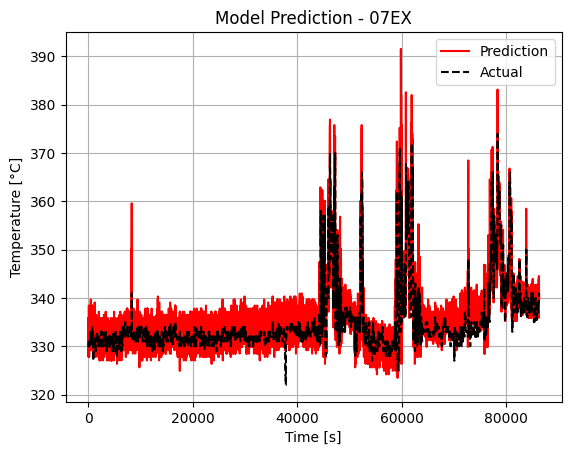


Mean Squared Error: 10.353785815308367
Root Mean Squared Error: 3.217729916464147
Mean Absolute Error: 2.3507802586523754
R-squared: 0.7669052973442989 



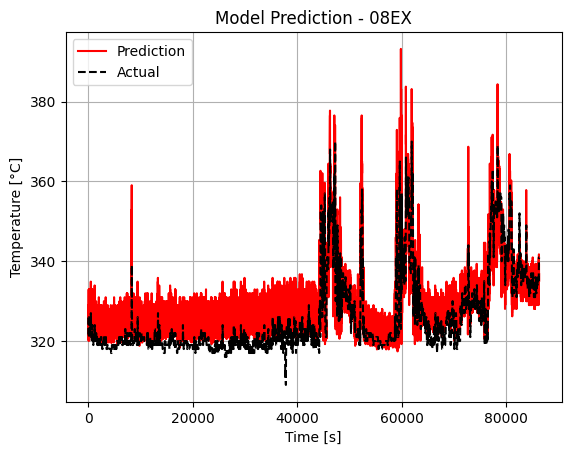


Mean Squared Error: 33.122620199702034
Root Mean Squared Error: 5.755225469058709
Mean Absolute Error: 4.803744183474153
R-squared: 0.68380731334506 



In [55]:
# Looping through each array of attribute predictions
for i in range(num_attributes_y):

  feature = cylinders[i]

  # Converting attribute predictions and actual values to numpy arrays
  prediction  = predictions[cylinders.index(feature)]
  actual      = selected_data[feature].values

  # Plotting line graphs for prediction vs. actual
  plt.plot(prediction, label='Prediction', color='red')
  plt.plot(actual, label='Actual', color='black', linestyle='dashed')

  plt.xlabel('Time [s]')
  plt.ylabel('Temperature [°C]')
  plt.title('Model Prediction - ' + feature)

  plt.legend()
  plt.grid()
  plt.show()

  # Calculating quantitative accuracy measures
  mse = mean_squared_error(actual, prediction)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(actual, prediction)
  r2 = r2_score(actual, prediction)

  # Printing quantitative accuracy measures
  print('\nMean Squared Error:', mse)
  print('Root Mean Squared Error:', rmse)
  print('Mean Absolute Error:', mae)
  print('R-squared:', r2, '\n')